## **Heart Failure Prediction Dataset**

**Context**

Cardiovascular diseases (CVDs) *are the number 1 cause of death globally*, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains *11 features* that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

**Attribute Information**

**Age:** age of the patient [years]

**Sex:** sex of the patient [M: Male, F: Female]

**ChestPainType**: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

**RestingBP:** resting blood pressure [mm Hg]

**Cholesterol:** serum cholesterol [mm/dl]

**FastingBS:** fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

**RestingECG**: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

**MaxHR:** maximum heart rate achieved [Numeric value between 60 and 202]

**ExerciseAngina:** exercise-induced angina [Y: Yes, N: No]

**Oldpeak**: oldpeak = ST [Numeric value measured in depression]

**ST_Slope:** the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

**HeartDisease**: output class [1: heart disease, 0: Normal]

The provided code is an implementation of a machine learning pipeline for predicting heart failure based on a given dataset.
Here is a breakdown of the code:

The code starts with some context information about cardiovascular diseases (CVDs) and the importance of early detection using machine learning models.

The attribute information section describes the different features available in the dataset, including age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiogram results, maximum heart rate achieved, exercise-induced angina, old peak, ST segment slope, and the output class indicating the presence of heart disease.

The code then installs necessary libraries using pip, including pandas, matplotlib, seaborn, and scikit-learn.

The necessary libraries are imported, including pandas, numpy, matplotlib, seaborn, and various classifiers and metrics from scikit-learn.

Exploratory Data Analysis (EDA) is performed on the dataset using pandas, matplotlib, and seaborn. The code loads the dataset from a CSV file and displays the first few rows, shape, missing values, and duplicated rows. It also generates histograms and other visualizations to analyze the distribution and relationships between different variables in the dataset.

Categorical features in the dataset are transformed using label encoding from sklearn.preprocessing.LabelEncoder.

Feature scaling is performed on numerical features using MinMaxScaler and StandardScaler from sklearn.preprocessing.

The dataset is split into training and testing sets using train_test_split from sklearn.model_selection.

Several machine learning models are trained and evaluated on the dataset, including Logistic Regression, Decision Tree, Random Forest, Support Vector Machine, Gradient Boosting Machines (GBM), Naive Bayes, and K-Nearest Neighbors (KNN). The accuracy scores of each model are printed.

Confusion matrices are generated for each model to evaluate their performance.

Finally, the accuracy scores of all models are compared, and the best model and its corresponding accuracy are printed.

Overall, this code performs data loading, preprocessing, feature scaling, model training, evaluation, and comparison using different machine learning algorithms for heart failure prediction.

# **Let's import the necessary libraries and load the dataset:**

In [1]:
#pip install xgboost

In [2]:
#pip install wordcloud

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from xgboost import XGBClassifier
from xgboost import plot_tree
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
import pandas_profiling as pf

In [4]:
# Load the dataset
df = pd.read_csv('heart.csv')

# Display the first few rows of the dataset
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
print(f'The dataset has a shape of {df.shape}')

print(f'The dataset has {df.isnull().sum().sum()} missing values')

print(f'The dataset has {df.duplicated().sum()} duplicated rows')

The dataset has a shape of (918, 12)
The dataset has 0 missing values
The dataset has 0 duplicated rows


In [6]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# **Exploratory Data Analysis**

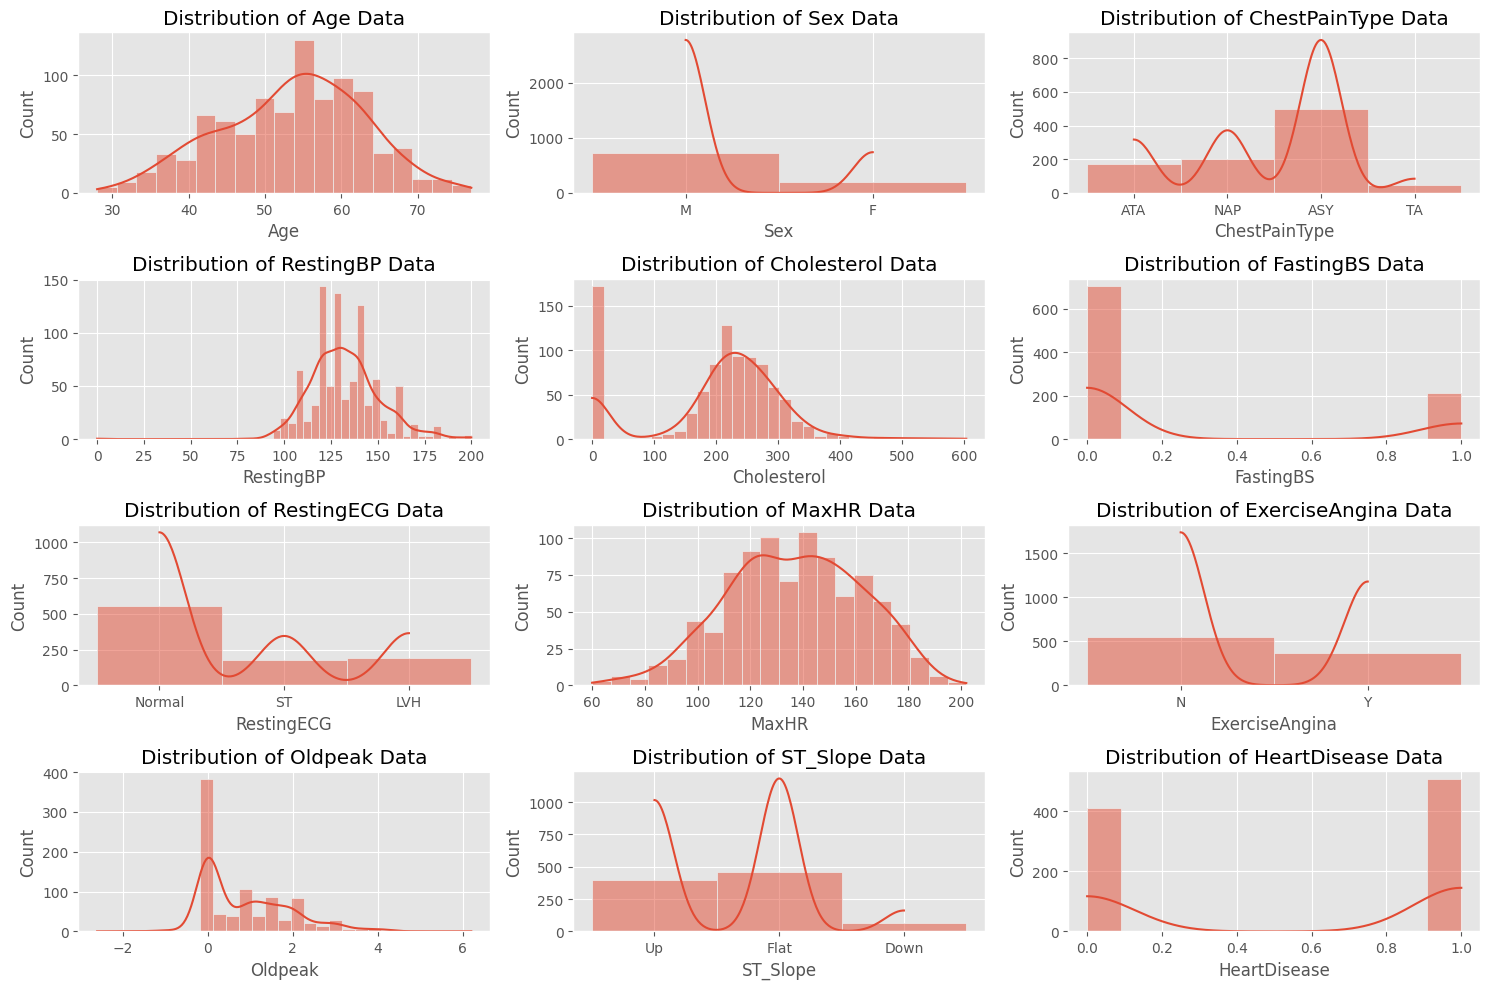

In [8]:
# we can check the linearity of the variables by plotting the distribution graph and looking for skewness of features.
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()

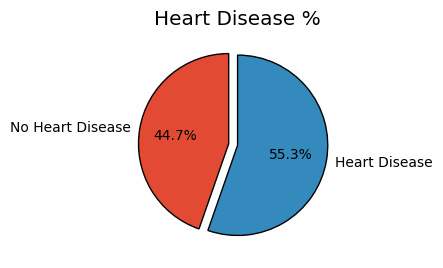

In [9]:
l = list(df['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100,l[0] / sum(l) * 100]

plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Heart Disease %');

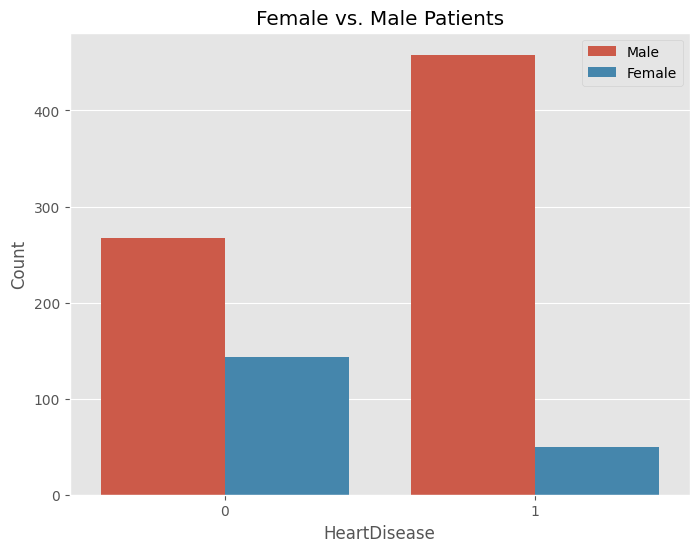

In [10]:
# Bar plot of female vs. male patients
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='HeartDisease', hue='Sex')
plt.title('Female vs. Male Patients')
plt.xlabel('HeartDisease')
plt.ylabel('Count')
plt.legend(['Male', 'Female'])
plt.show()


The male records significantly outnumber the female records in this dataset.

It is important to be mindful of this gender imbalance in our dataset to avoid introducing bias when making assumptions or drawing conclusions as ofcourse we can see that the most patiens that have had heart disease are males.

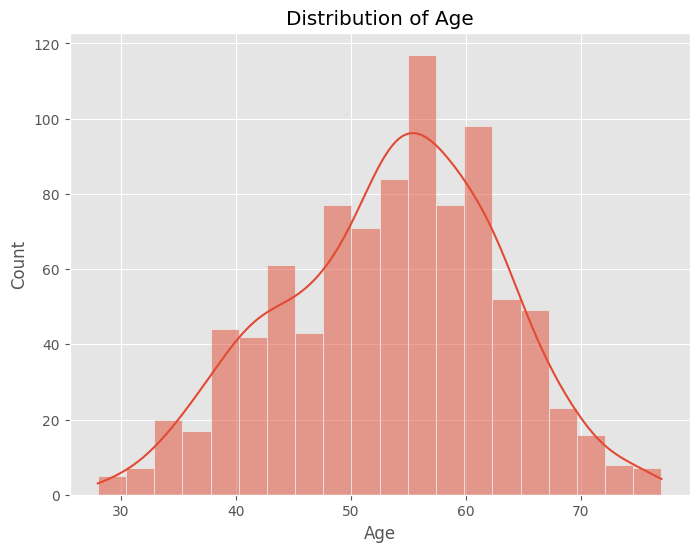

In [11]:
# Histogram of age
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


Let's check for outliers

In [12]:
df['Age'].skew()

-0.19593302867569365

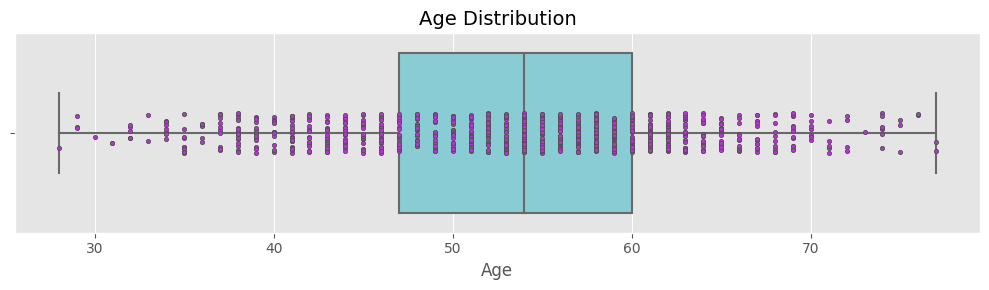

In [13]:
#Age
fig, ax = plt.subplots(figsize=(10, 3))
sns.boxplot(data=df, x='Age', color='#7ed6df')
sns.stripplot(data=df, x='Age', linewidth = 0.6, size=3, color='#be2edd')
plt.title('Age Distribution',fontsize= 14)
plt.tight_layout()
plt.show()

Notes:

Data is almost normal, has a skewnes of -0.20, which means that the data is asymetrical on the left side.

No outliers



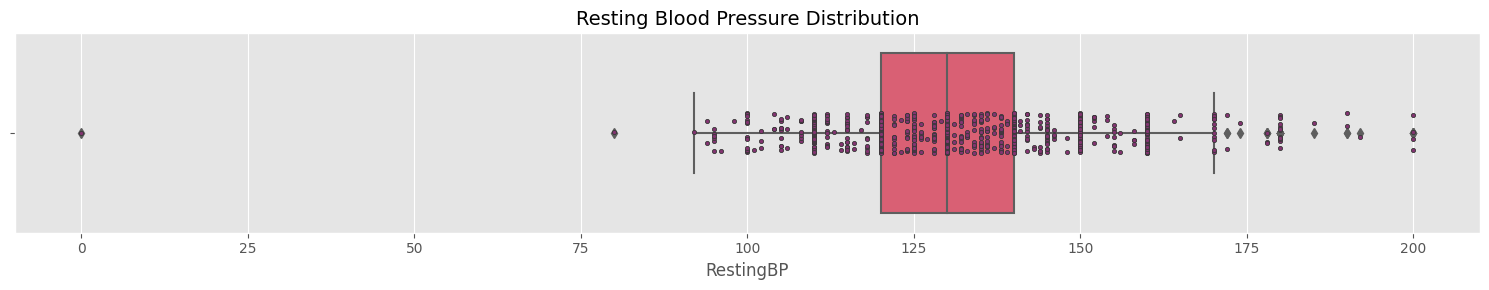

In [14]:
#RestingBP
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(data=df, x='RestingBP', color='#ED4C67')
sns.stripplot(data=df, x='RestingBP', linewidth = 0.6, size=3, color='#833471')
plt.title('Resting Blood Pressure Distribution',fontsize= 14)
plt.tight_layout()
plt.show()

In [15]:
(df["RestingBP"] == 0).sum()

1

In [16]:
df['RestingBP'].skew()


0.1798393100516288

Notes:

Data is almost normal, has a skewnes of 0.18, which means that the data is asymetrical on the right side.

There are some outliers that seem not to have any impact. Resting BP can go as high as 200 and it is called the stage 2 blood pressure and it can be risk of heart failure.

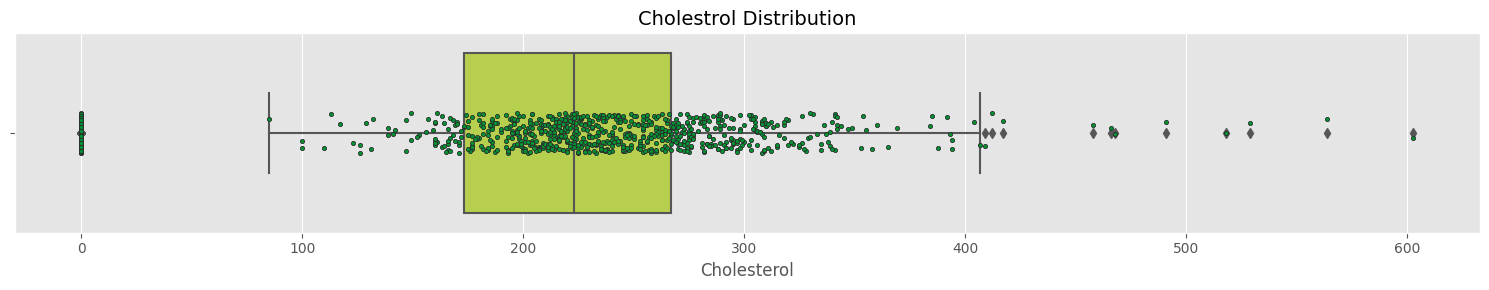

In [17]:
#Cholesterol
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(data=df, x='Cholesterol', color='#C4E538')
sns.stripplot(data=df, x='Cholesterol', linewidth = 0.6, size=3, color='#009432')
plt.title('Cholestrol Distribution',fontsize= 14)
plt.tight_layout()
plt.show()

In [18]:
df['Cholesterol'].skew()

-0.6100864307268192

In [19]:
(df["Cholesterol"] == 0).sum() ## before runing the code used to be 172 

172

In [20]:
feature_to_fill = 'Cholesterol'

# Calculate the mean of non-zero values
mean_value = df[df["Cholesterol"] != 0]["Cholesterol"].mean()

# Fill 0 values with the mean
df.loc[df["Cholesterol"] == 0, "Cholesterol"] = mean_value


df.to_csv('heart.csv', index=False)

In [21]:
(df["Cholesterol"] == 0).sum()

0

Notes:

Cholesterol has a Bimodal distribution, as we can see it has two peaks.
Has a skewnes of -0.61, which means that the data is asymetrical on the left side.
Cholesterol levels of zero are highly unlikely and often high cholesterol is related to risk of heart disease. But in our data, we can see that even people having 0 cholesterol (with other normal parameters) are prone to heart disease. So this seems like an error in value entering and we decided to fill theese values with the mean.

On the other side of the spectrum, values above 400, are high but they are not outliers cause the range goes as high as 800 and these people also have a risk of heart disease with high cholesterol.

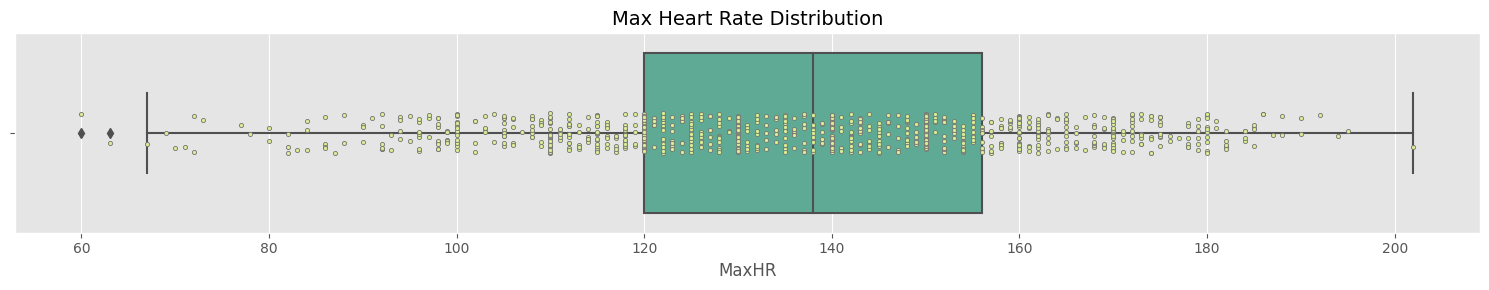

In [22]:
fig, ax = plt.subplots(figsize=(15, 3))
sns.boxplot(data=df, x='MaxHR', color='#52b69a')
sns.stripplot(data=df, x='MaxHR', linewidth = 0.6, size=3, color='#d9ed92')
plt.title('Max Heart Rate Distribution',fontsize= 14)
plt.tight_layout()
plt.show()

In [23]:
df['MaxHR'].skew()

-0.14435941846180994

Notes:

Almost normally distributed with a skewnes of -0.14

There are some outliers

Most people have a max heart rate of 150, which seems okay as most of the people in this dataset are aged between 50 - 65

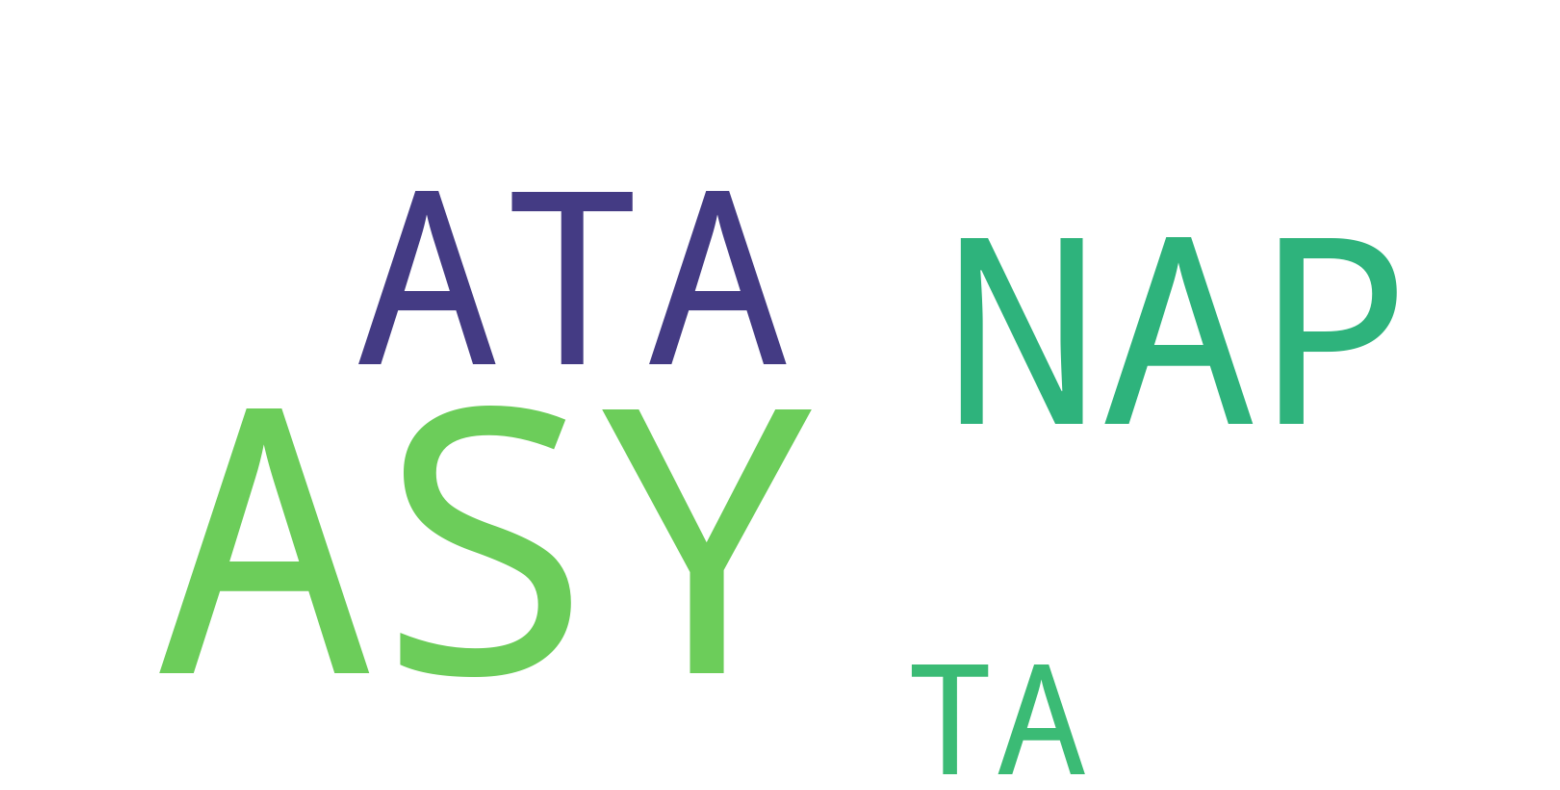

In [24]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

wc = WordCloud(background_color='white', max_words=2000, width=1600, height=800)
wc.generate(' '.join(df['ChestPainType']))
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show();

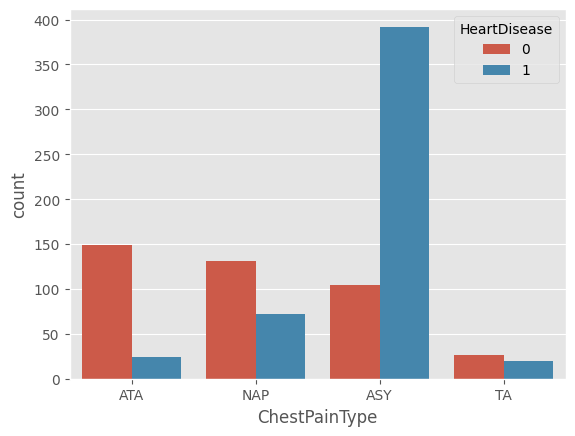

In [25]:
sns.countplot(x = 'ChestPainType', hue = 'HeartDisease', data = df);

Notes:

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

Asymptomatic patients have a higher chance of developing heart disease. This suggests that a significant number of patients in the dataset may have experienced a silent heart attack, also known as silent myocardial infarction (SMI).


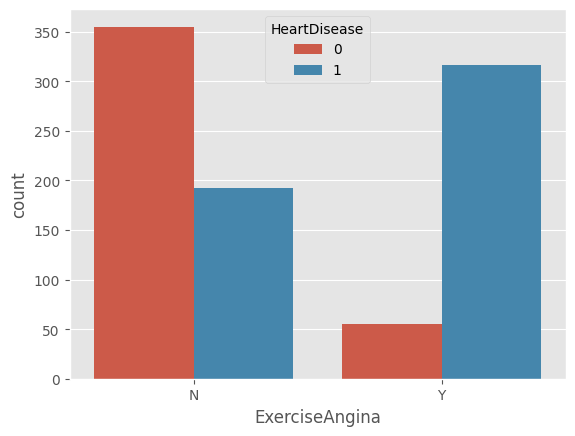

In [26]:
sns.countplot(x = 'ExerciseAngina', hue = 'HeartDisease', data = df);

Patients who experience exercise induced angina are more likely to have heart disease.

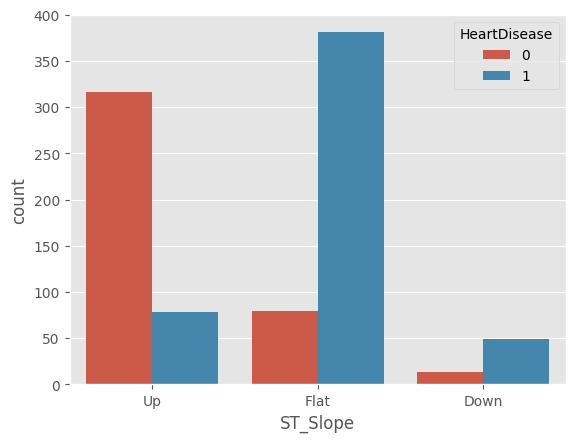

In [27]:
sns.countplot(x = 'ST_Slope', hue = 'HeartDisease', data = df);

In [28]:
for i in df.ST_Slope.unique():
    value = round((len(df[(df['ST_Slope'] == i) & (df['HeartDisease'] == 1)]) / df.ST_Slope.value_counts()[i]) * 100, 2)
    print(f'Percentage of {i} ST slope patients with heart disease: {value} %')

Percentage of Up ST slope patients with heart disease: 19.75 %
Percentage of Flat ST slope patients with heart disease: 82.83 %
Percentage of Down ST slope patients with heart disease: 77.78 %


Almost 80% of patients with flat-sloping and down-sloping ST segment depression have heart disease. This finding is consistent with the medical articles which suggests that flat-sloping and down-sloping ST segment depression are indicators of heart disease.

[]

<Figure size 1500x1000 with 0 Axes>

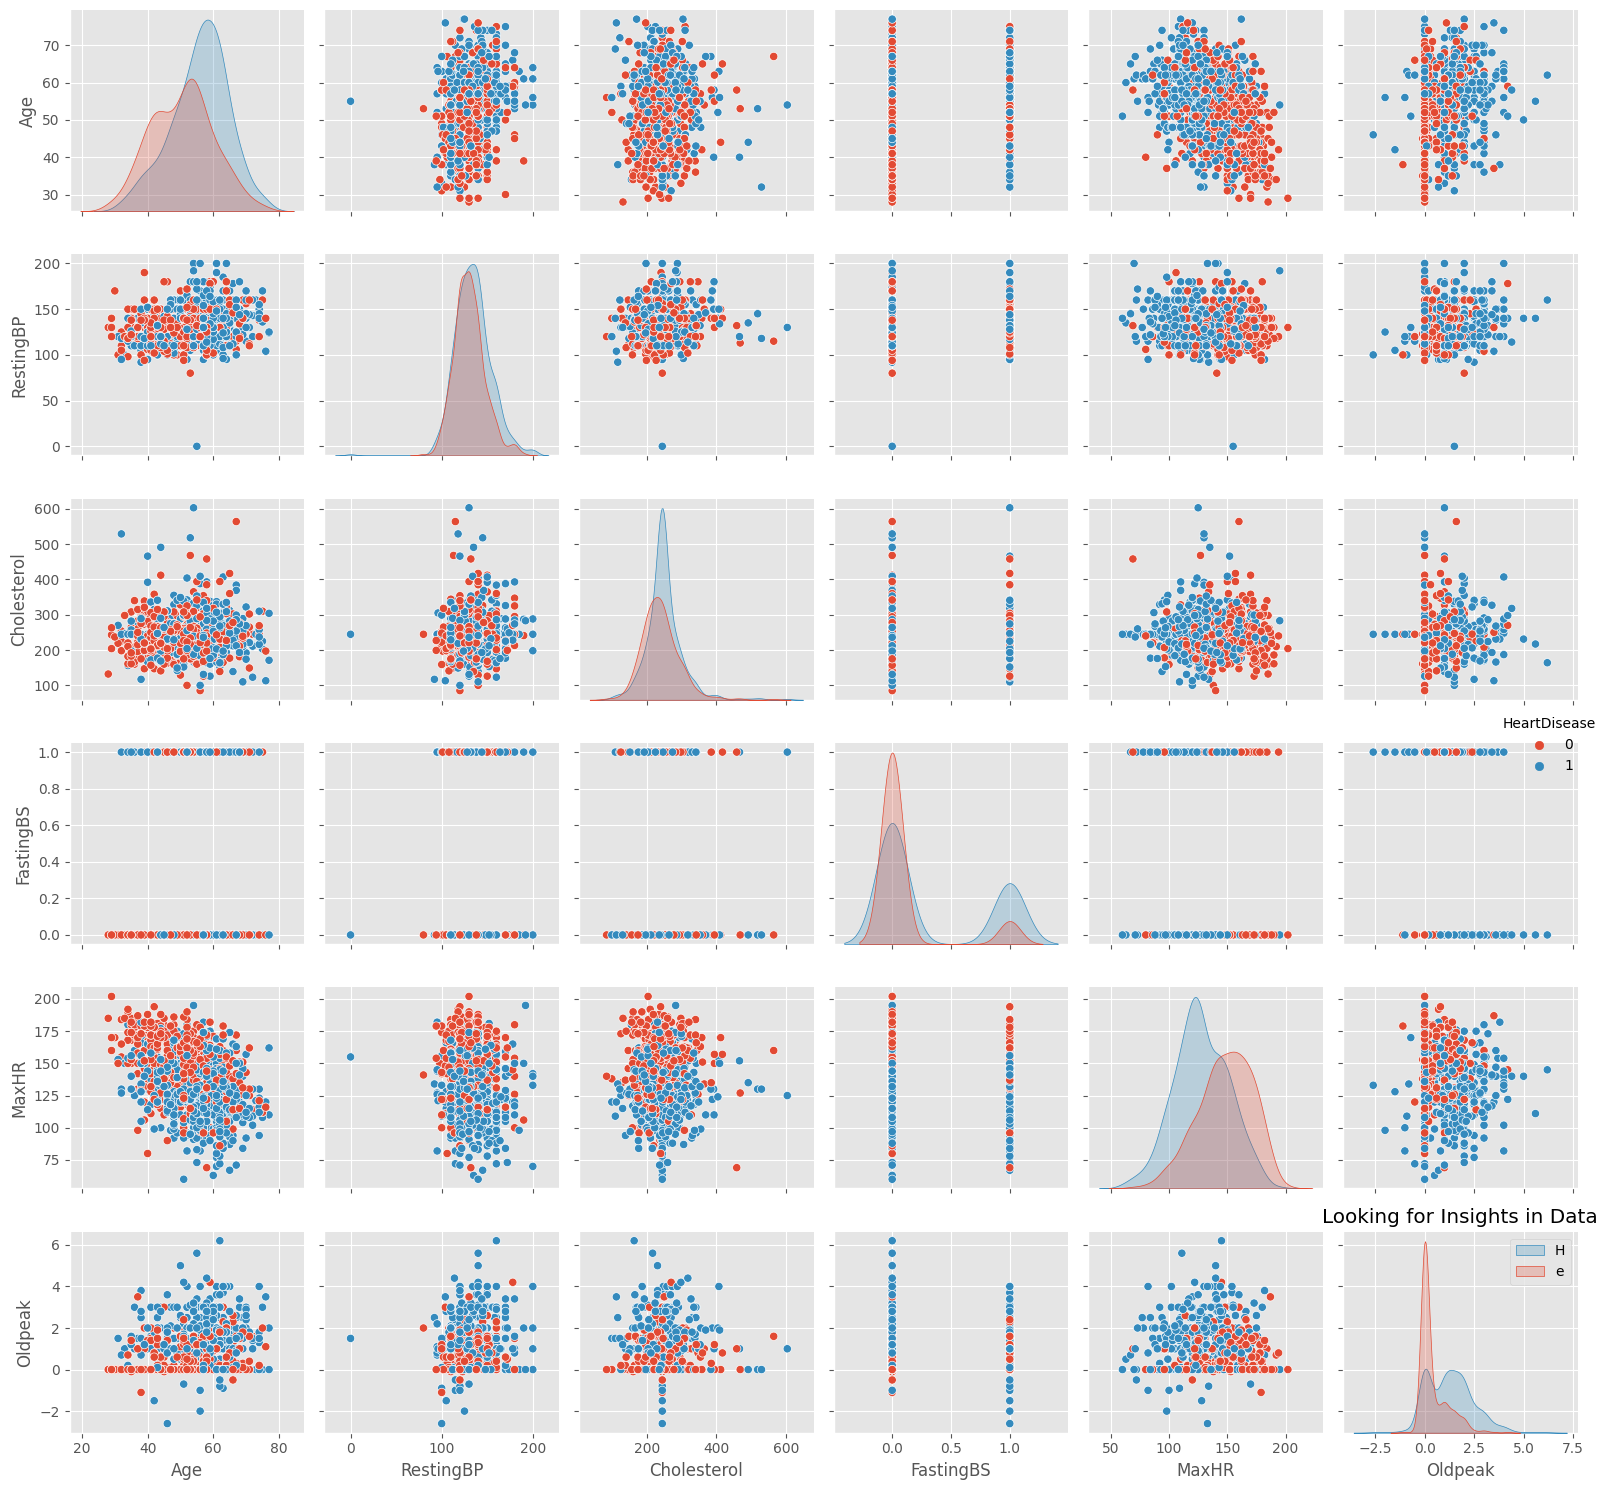

In [29]:
# We can view the relationship by pairplot
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for Insights in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()

Individuals under the age of 50 have a lower likelihood of experiencing heart disease.
Once individuals reach the age of 50, the risk of developing heart disease significantly increases.
The age group between 55 and 60 shows the highest susceptibility to heart disease.
Individuals above the age of 60 consistently have a higher chance of developing heart disease compared to not having it.

# **Transform Categorical Features**

In order to proceed with machine learning models, categorical variable transformation is mandatory because machine learning models can handle only numeric values.

In [30]:
categorical_features = ['Sex','ChestPainType','RestingECG','ExerciseAngina','FastingBS','ST_Slope','HeartDisease']
numerical_features = ['Age','RestingBP','MaxHR','Cholesterol','Oldpeak']

In [31]:
le = LabelEncoder()  ###Target Encoding
df1 = df.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

In [32]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0,1,172,0,0.0,2,0
1,49,0,2,160,180.0,0,1,156,0,1.0,1,1
2,37,1,1,130,283.0,0,2,98,0,0.0,2,0
3,48,0,0,138,214.0,0,1,108,1,1.5,1,1
4,54,1,2,150,195.0,0,1,122,0,0.0,2,0


# **We need to do Feature Scaling**


Dataset contains features that are varying in degrees of magnitude, range and units. Therefore, in order for machine learning models to interpret these features on the same scale, we need to perform feature scaling.

In [33]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.832529,0,1,1.382928,0,0.295455,2,0
1,-0.478484,0,2,1.491752,-1.212922,0,1,0.754157,0,0.409091,1,1
2,-1.751359,1,1,-0.129513,0.719935,0,2,-1.525138,0,0.295455,2,0
3,-0.584556,0,0,0.302825,-0.574892,0,1,-1.132156,1,0.465909,1,1
4,0.051881,1,2,0.951331,-0.931438,0,1,-0.581981,0,0.295455,2,0


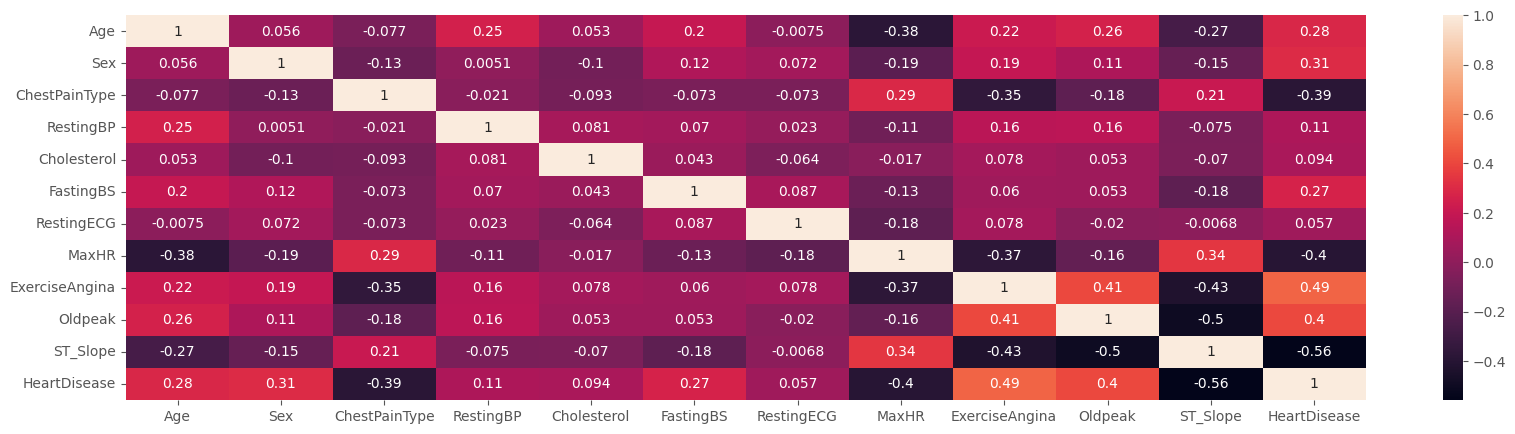

In [34]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),annot = True);

# **Feature Selection for Categorical Features**

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

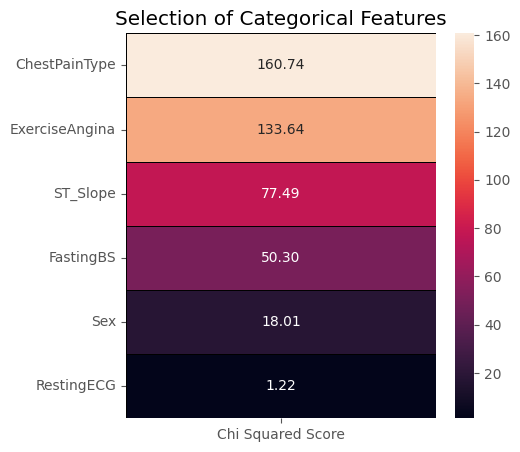

In [36]:
features = df1.loc[:,categorical_features[:-1]]
target = df1['HeartDisease']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,linewidths = 0.6,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

We can drop RestingECG as it has a very low chi2 score and there is a significant difference between the categories of data in consideration.

# **Feature selection for numerical Features**

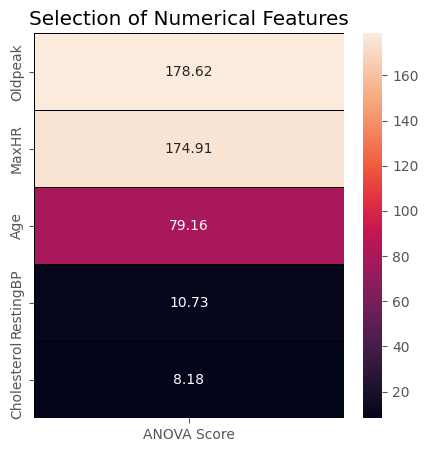

In [37]:
from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1['HeartDisease']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,linewidths = 0.6,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

Cholesterol can be dropped as it has very less ANOVA score

# **Prepare the data for training the machine learning models**

In [38]:
# Split the dataset into features (X) and target variable (y)
X = df1[df1.columns.drop(['HeartDisease','RestingECG','Cholesterol'])].values
y = df1['HeartDisease'].values



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Train and evaluate different machine learning models**

Logistic Regression Accuracy: 0.8369565217391305
Classification Metrics:
               precision    recall  f1-score   support

           0       0.76      0.88      0.82        77
           1       0.91      0.80      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184

AUC: 0.8434276004369461


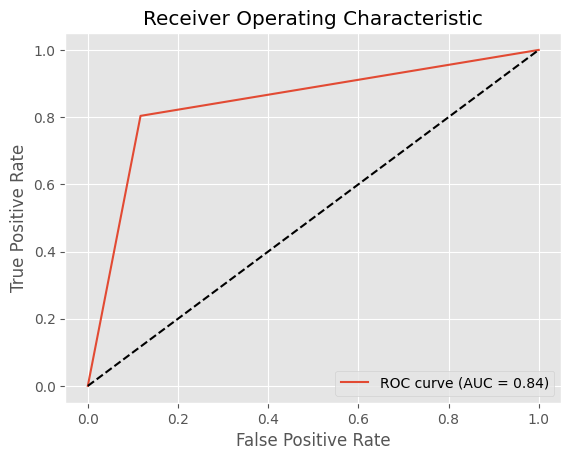

In [39]:
# Logistic Regression

logreg = LogisticRegression(
    penalty='l2',
    C=1.0,
    solver='lbfgs',
    random_state=42
)

# Train the Logistic Regression classifier
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg.predict(X_test)

# Calculate accuracy score
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Calculate precision, recall, and F1-score
classification_metrics = classification_report(y_test, y_pred_logreg)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
auc = roc_auc_score(y_test, y_pred_logreg)

# Print the accuracy and other metrics
print('Logistic Regression Accuracy:', accuracy_logreg)
print('Classification Metrics:\n', classification_metrics)
print('AUC:', auc)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Decision Tree Accuracy: 0.8260869565217391
Classification Metrics:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81        77
           1       0.90      0.79      0.84       107

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.82       184
weighted avg       0.84      0.83      0.83       184

AUC: 0.8340818060444228


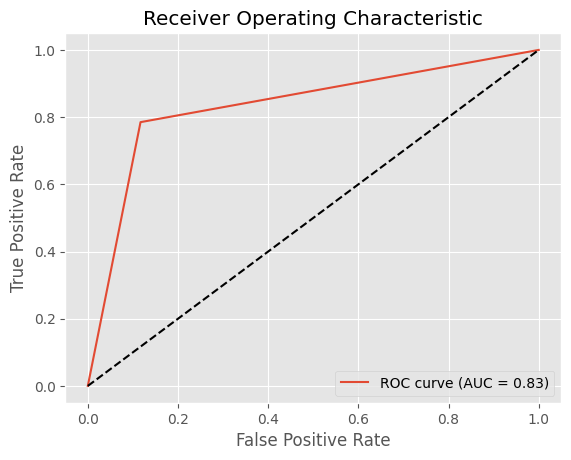

In [40]:
# Decision Tree

dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    random_state=42
)

# Train the Decision Tree classifier
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt.predict(X_test)

# Calculate accuracy score
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# Calculate precision, recall, and F1-score
classification_metrics = classification_report(y_test, y_pred_dt)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
auc = roc_auc_score(y_test, y_pred_dt)

# Print the accuracy and other metrics
print('Decision Tree Accuracy:', accuracy_dt)
print('Classification Metrics:\n', classification_metrics)
print('AUC:', auc)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Random Forest Accuracy: 0.8532608695652174
Classification Metrics:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83        77
           1       0.89      0.85      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

AUC: 0.8538050734312417


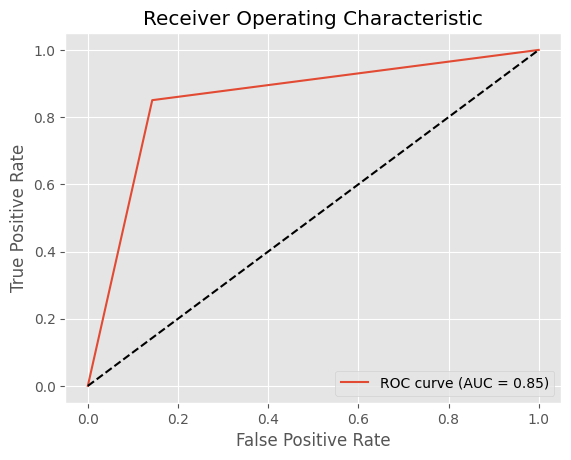

In [41]:
# Random Forest

rf = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=5,
    random_state=42
)

# Train the Random Forest classifier
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Calculate accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Calculate precision, recall, and F1-score
classification_metrics = classification_report(y_test, y_pred_rf)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
auc = roc_auc_score(y_test, y_pred_rf)

# Print the accuracy and other metrics
print('Random Forest Accuracy:', accuracy_rf)
print('Classification Metrics:\n', classification_metrics)
print('AUC:', auc)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


Support Vector Machine Accuracy: 0.8369565217391305
Classification Metrics:
               precision    recall  f1-score   support

           0       0.78      0.86      0.81        77
           1       0.89      0.82      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184

AUC: 0.8397863818424568


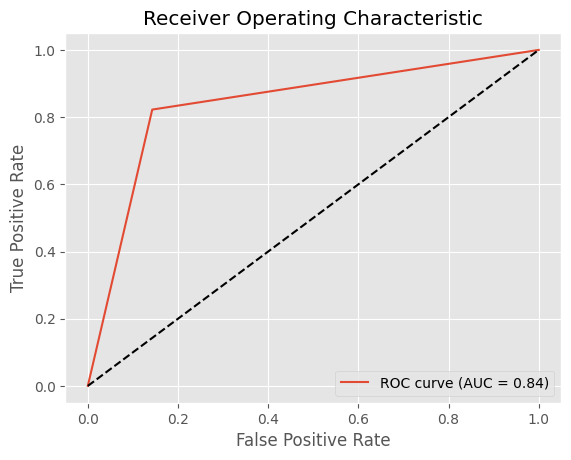

In [42]:
# Support Vector Machine

svm = SVC(
    C=1.0,
    kernel='rbf',
    gamma='scale'
)

# Train the SVM classifier
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm.predict(X_test)

# Calculate accuracy score
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Calculate precision, recall, and F1-score
classification_metrics = classification_report(y_test, y_pred_svm)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_svm)
auc = roc_auc_score(y_test, y_pred_svm)

# Print the accuracy and other metrics
print('Support Vector Machine Accuracy:', accuracy_svm)
print('Classification Metrics:\n', classification_metrics)
print('AUC:', auc)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Gradient Boosting Machines Accuracy: 0.8097826086956522
Classification Metrics:
               precision    recall  f1-score   support

           0       0.74      0.83      0.79        77
           1       0.87      0.79      0.83       107

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.82      0.81      0.81       184

AUC: 0.8127806772666586


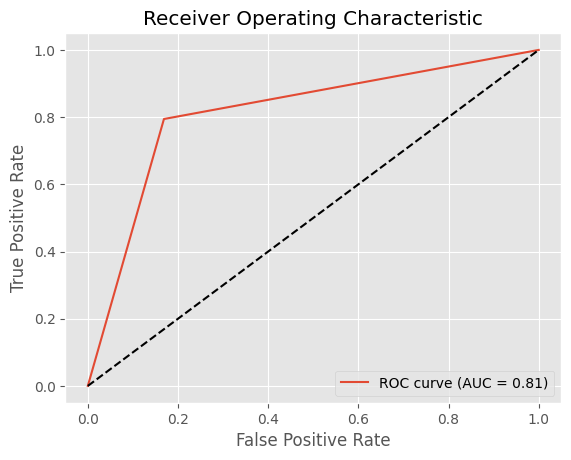

In [43]:
# Gradient Boosting Machines (GBM)

gbm = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)

# Train the GBM classifier
gbm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbm = gbm.predict(X_test)

# Calculate accuracy score
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)

# Calculate precision, recall, and F1-score
classification_metrics = classification_report(y_test, y_pred_gbm)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_gbm)
auc = roc_auc_score(y_test, y_pred_gbm)

# Print the accuracy and other metrics
print('Gradient Boosting Machines Accuracy:', accuracy_gbm)
print('Classification Metrics:\n', classification_metrics)
print('AUC:', auc)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

Naive Bayes Accuracy: 0.7989130434782609
Classification Metrics:
               precision    recall  f1-score   support

           0       0.72      0.86      0.78        77
           1       0.88      0.76      0.81       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.80       184

AUC: 0.8931909212283045


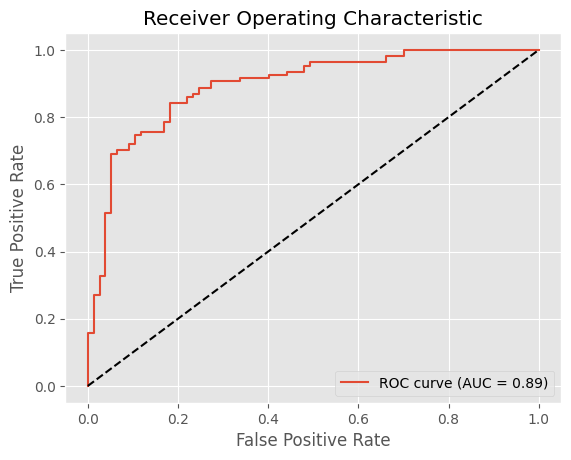

In [44]:
# Naive Bayes

nb = GaussianNB()

# Train the GaussianNB classifier
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb.predict(X_test)
y_pred_proba_nb = nb.predict_proba(X_test)[:, 1]  # Probability estimates for positive class

# Calculate accuracy score
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Calculate precision, recall, and F1-score
classification_metrics = classification_report(y_test, y_pred_nb)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_nb)
auc = roc_auc_score(y_test, y_pred_proba_nb)

# Print the accuracy and other metrics
print('Naive Bayes Accuracy:', accuracy_nb)
print('Classification Metrics:\n', classification_metrics)
print('AUC:', auc)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

K-Nearest Neighbors Accuracy: 0.8097826086956522
Classification Metrics:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        77
           1       0.86      0.80      0.83       107

    accuracy                           0.81       184
   macro avg       0.80      0.81      0.81       184
weighted avg       0.81      0.81      0.81       184

AUC: 0.8109600679694136


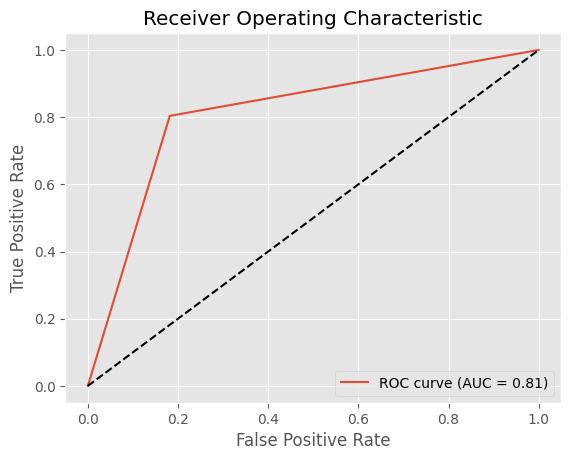

In [45]:
# K-Nearest Neighbors (KNN)

knn = KNeighborsClassifier(
    n_neighbors=3,  # Number of neighbors to consider
    weights='uniform'  # Weight function for prediction
)

# Train the KNN classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Calculate accuracy score
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Calculate precision, recall, and F1-score
classification_metrics = classification_report(y_test, y_pred_knn)

# Print the accuracy and other metrics
print('K-Nearest Neighbors Accuracy:', accuracy_knn)
print('Classification Metrics:\n', classification_metrics)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn)
auc = roc_auc_score(y_test, y_pred_knn)
print('AUC:', auc)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Confusion matrices to evaluate the performance of each model

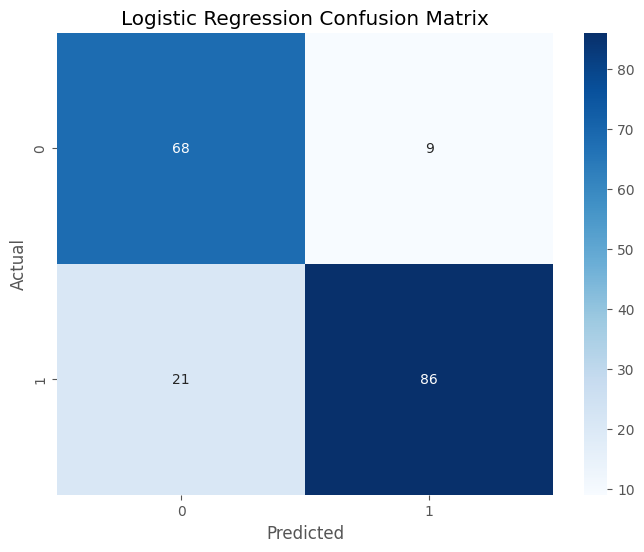

In [46]:
# Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, cmap='Blues', fmt='d')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

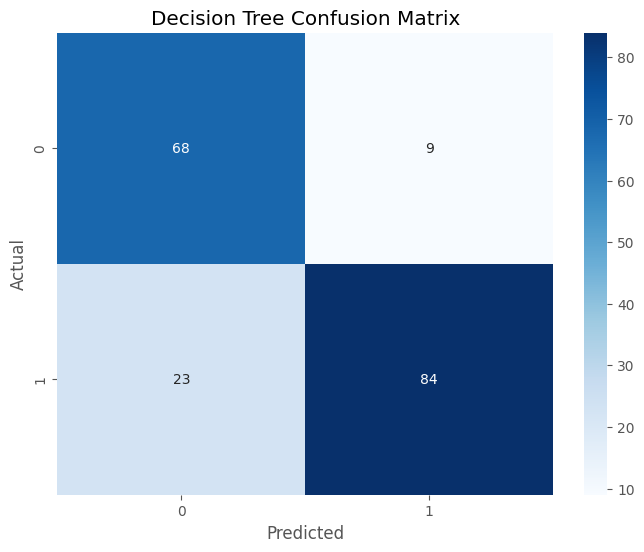

In [47]:
# Confusion Matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, cmap='Blues', fmt='d')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

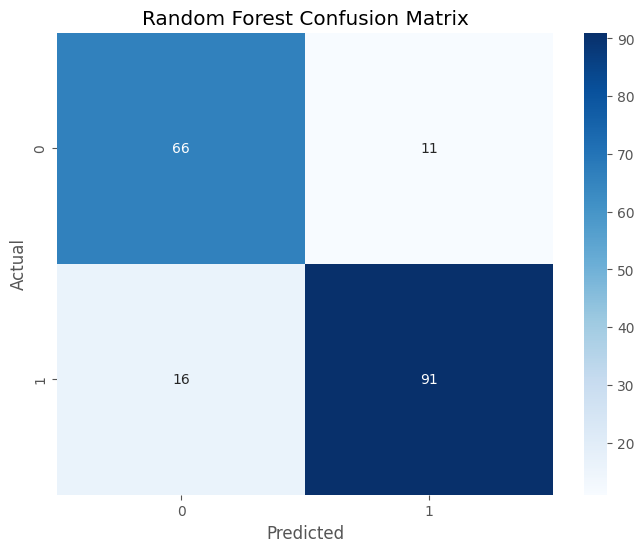

In [48]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

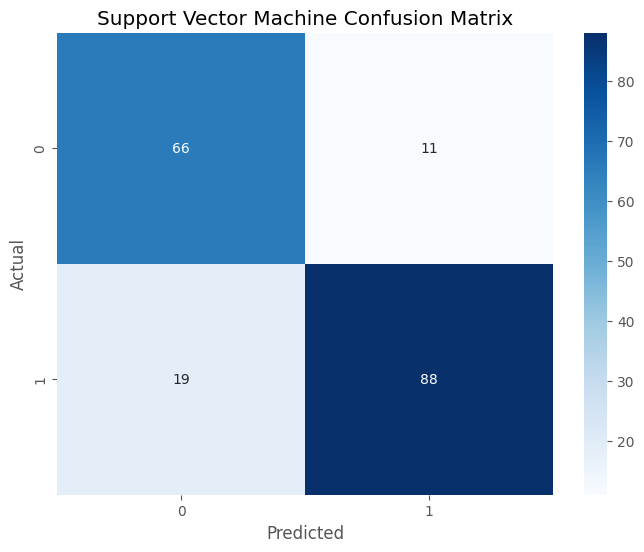

In [49]:
# Confusion Matrix for Support Vector Machine
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d')
plt.title('Support Vector Machine Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

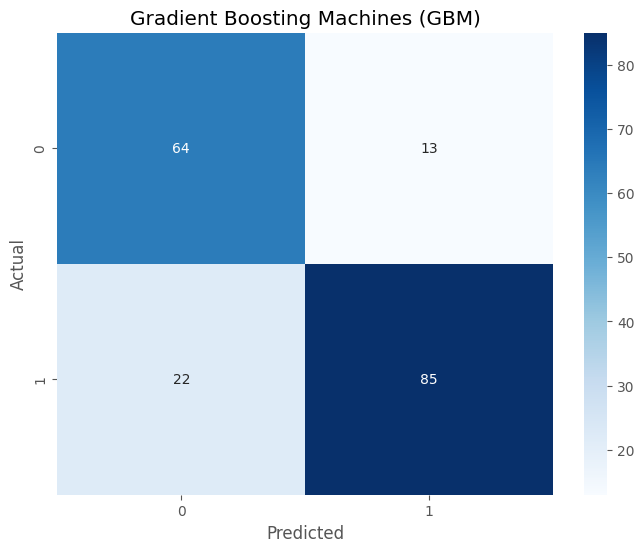

In [50]:
# Confusion Matrix for Gradient Boosting Machines (GBM)
cm_gbm = confusion_matrix(y_test, y_pred_gbm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gbm, annot=True, cmap='Blues', fmt='d')
plt.title('Gradient Boosting Machines (GBM)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

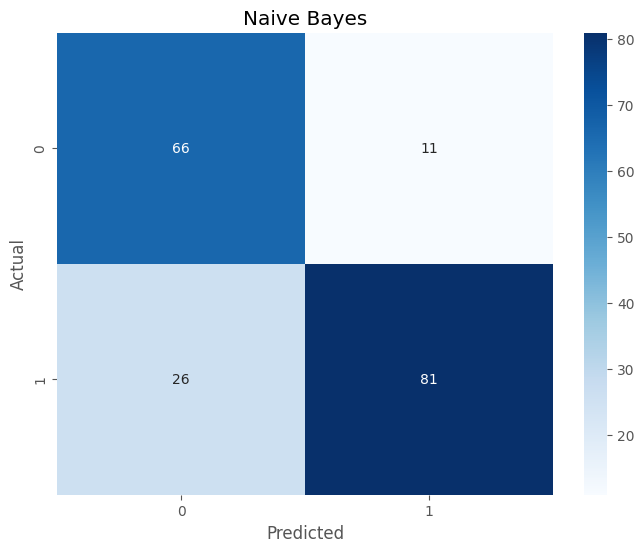

In [51]:
# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='d')
plt.title('Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

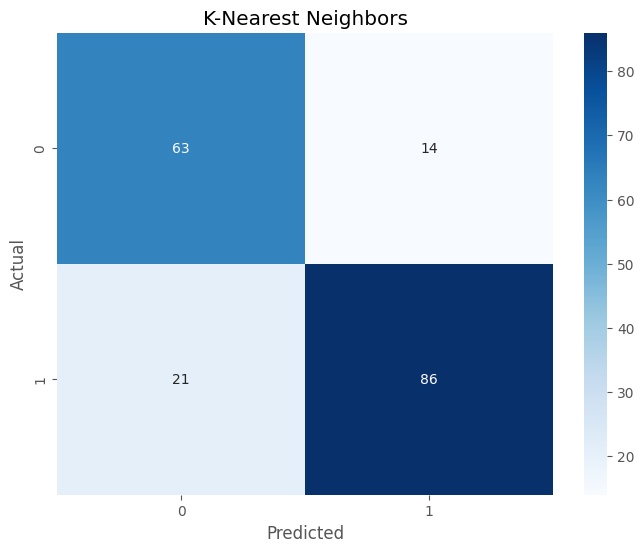

In [52]:
# Confusion Matrix for K-Nearest Neighbors (KNN)
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='d')
plt.title('K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [53]:
# Logistic Regression Accuracy
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)

# Decision Tree Accuracy
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# Random Forest Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Support Vector Machine Accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Gradient Boosting Machines (GBM) Accuracy
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)

# Naive Bayes Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# K-Nearest Neighbors (KNN) Accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Create a dictionary with model names as keys and accuracy scores as values
model_accuracy = {
    'Logistic Regression': logreg_accuracy,
    'Decision Tree': dt_accuracy,
    'Random Forest': rf_accuracy,
    'Support Vector Machine': svm_accuracy,
    'Gradient Boosting Machines (GBM)': accuracy_gbm,
    'Naive Bayes': accuracy_nb,
    'K-Nearest Neighbors (KNN)': accuracy_knn
}

# Let's sort the models based on accuracy in descending order
sorted_models = sorted(model_accuracy.items(), key=lambda x: x[1], reverse=True)

# Print the sorted models
for model, accuracy in sorted_models:
    print(f"{model}: {accuracy}")


Random Forest: 0.8532608695652174
Logistic Regression: 0.8369565217391305
Support Vector Machine: 0.8369565217391305
Decision Tree: 0.8260869565217391
Gradient Boosting Machines (GBM): 0.8097826086956522
K-Nearest Neighbors (KNN): 0.8097826086956522
Naive Bayes: 0.7989130434782609
